# hw2: Решающие деревья
Выполнил Баулкин Данир М8О-312Б-23
*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [28]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [29]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

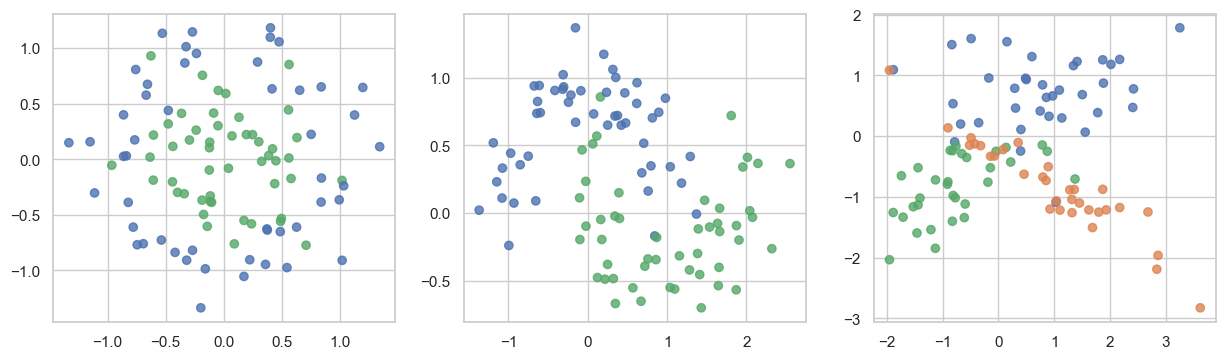

In [30]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [31]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

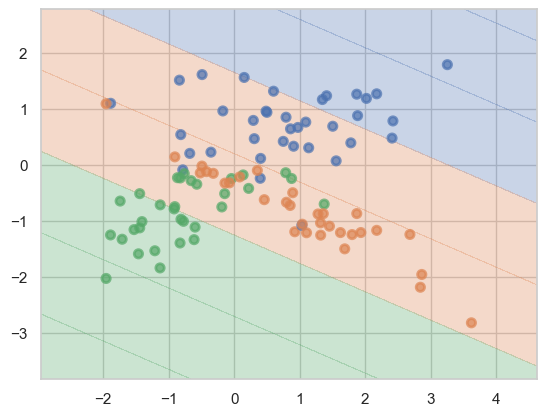

In [32]:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

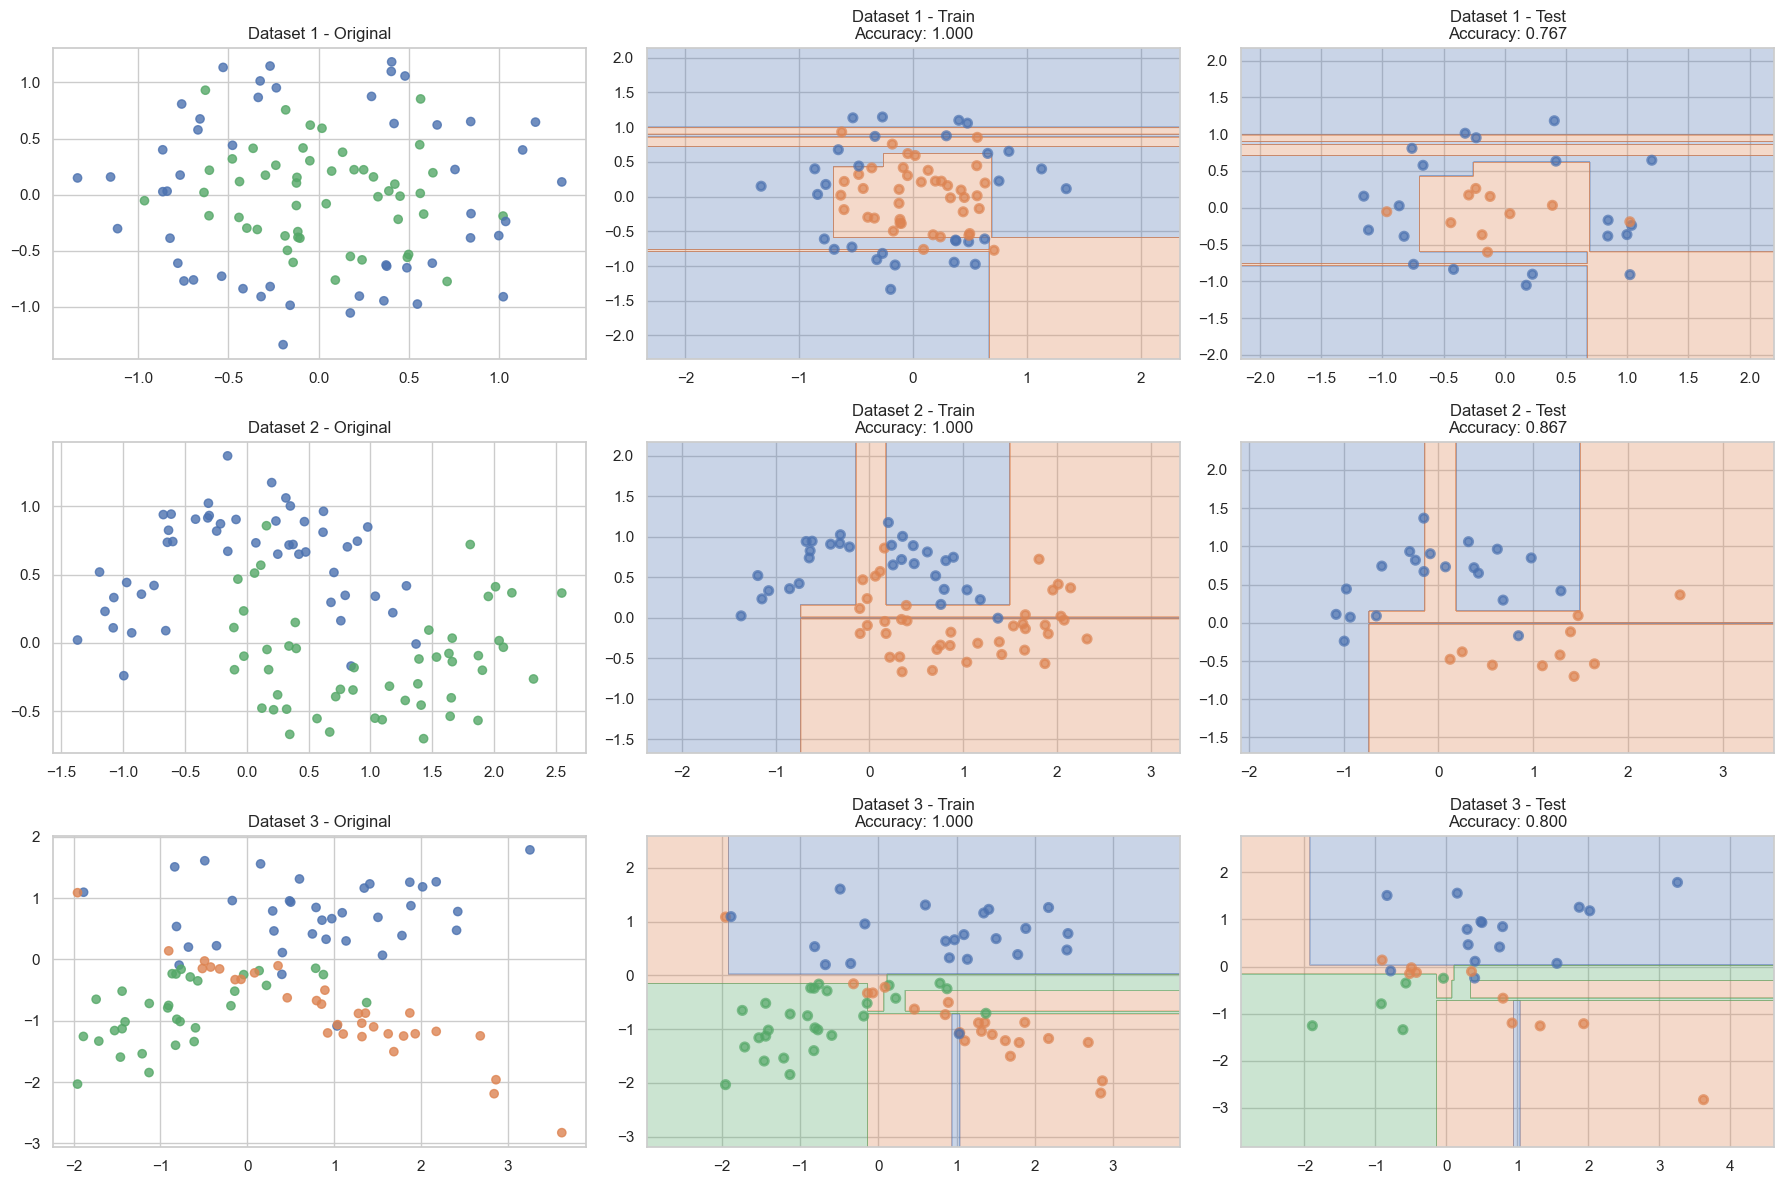

Датасет 1:
  Обучающая accuracy: 1.000
  Тестовая accuracy:  0.767
  Разница: 0.233

Датасет 2:
  Обучающая accuracy: 1.000
  Тестовая accuracy:  0.867
  Разница: 0.133

Датасет 3:
  Обучающая accuracy: 1.000
  Тестовая accuracy:  0.800
  Разница: 0.200



In [33]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ)cc:.3f}")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap

sns.set(style='whitegrid')

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3, n_redundant=0)
]

palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

plt.figure(figsize=(18, 12))

results = []

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    tree = DecisionTreeClassifier(random_state=52)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    results.append({
        'dataset': i+1,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'difference': train_accuracy - test_accuracy
    })
    
    plt.subplot(3, 3, i*3 + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.8)
    plt.title(f'Dataset {i+1} - Original')
    
    plt.subplot(3, 3, i*3 + 2)
    plot_surface(tree, X_train, y_train)
    plt.title(f'Dataset {i+1} - Train\nAccuracy: {train_accuracy:.3f}')
    
    plt.subplot(3, 3, i*3 + 3)
    plot_surface(tree, X_test, y_test)
    plt.title(f'Dataset {i+1} - Test\nAccuracy: {test_accuracy:.3f}')

plt.tight_layout()
plt.show()
for res in results:
    print(f"Датасет {res['dataset']}:")
    print(f"  Обучающая accuracy: {res['train_accuracy']:.3f}")
    print(f"  Тестовая accuracy:  {res['test_accuracy']:.3f}")
    print(f"  Разница: {res['difference']:.3f}")
    print()

__Ответ:__ Да, деревья явно переобучились

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

dataset №1
глубина дерева 6
обучающая Accuracy:1.000
тестовая Accuracy 0.760

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.70      0.70      0.70        20

    accuracy                           0.76        50
   macro avg       0.75      0.75      0.75        50
weighted avg       0.76      0.76      0.76        50



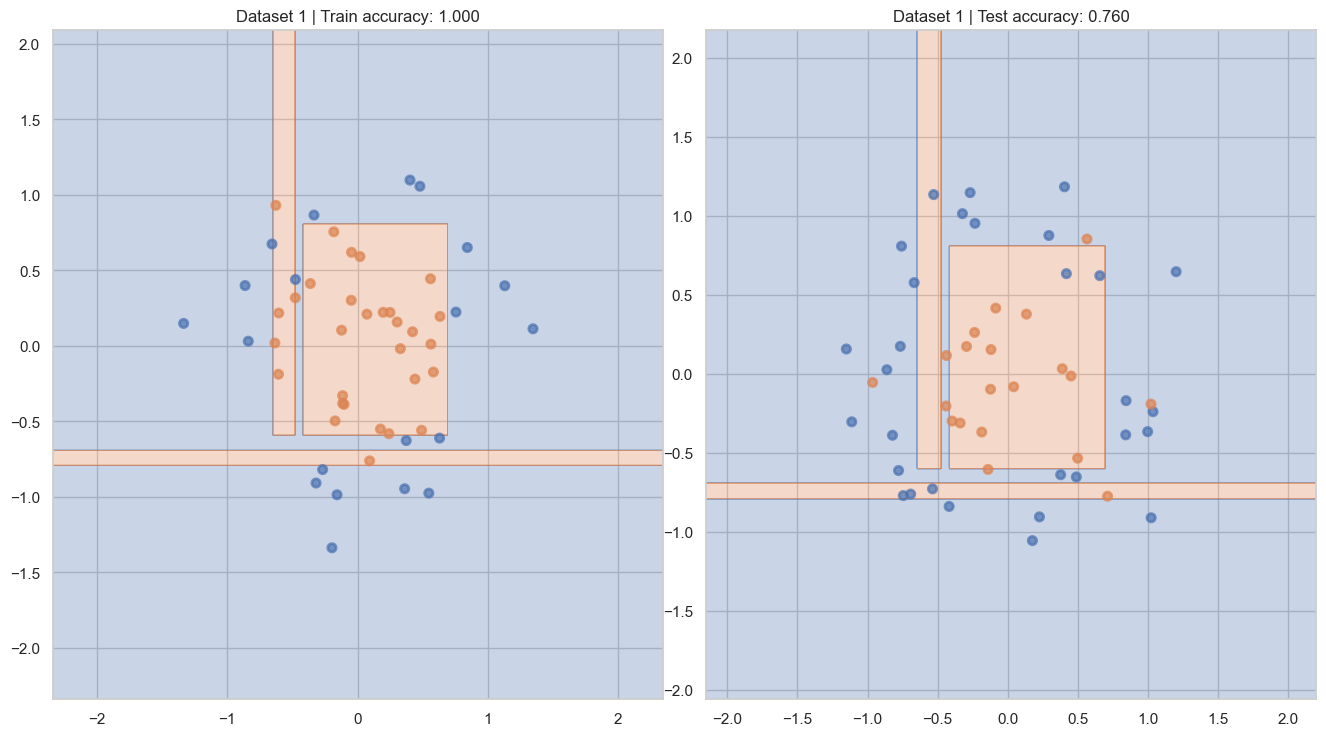

dataset №2
глубина дерева 5
обучающая Accuracy:1.000
тестовая Accuracy 0.800

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.73      0.80      0.76        20

    accuracy                           0.80        50
   macro avg       0.79      0.80      0.79        50
weighted avg       0.81      0.80      0.80        50



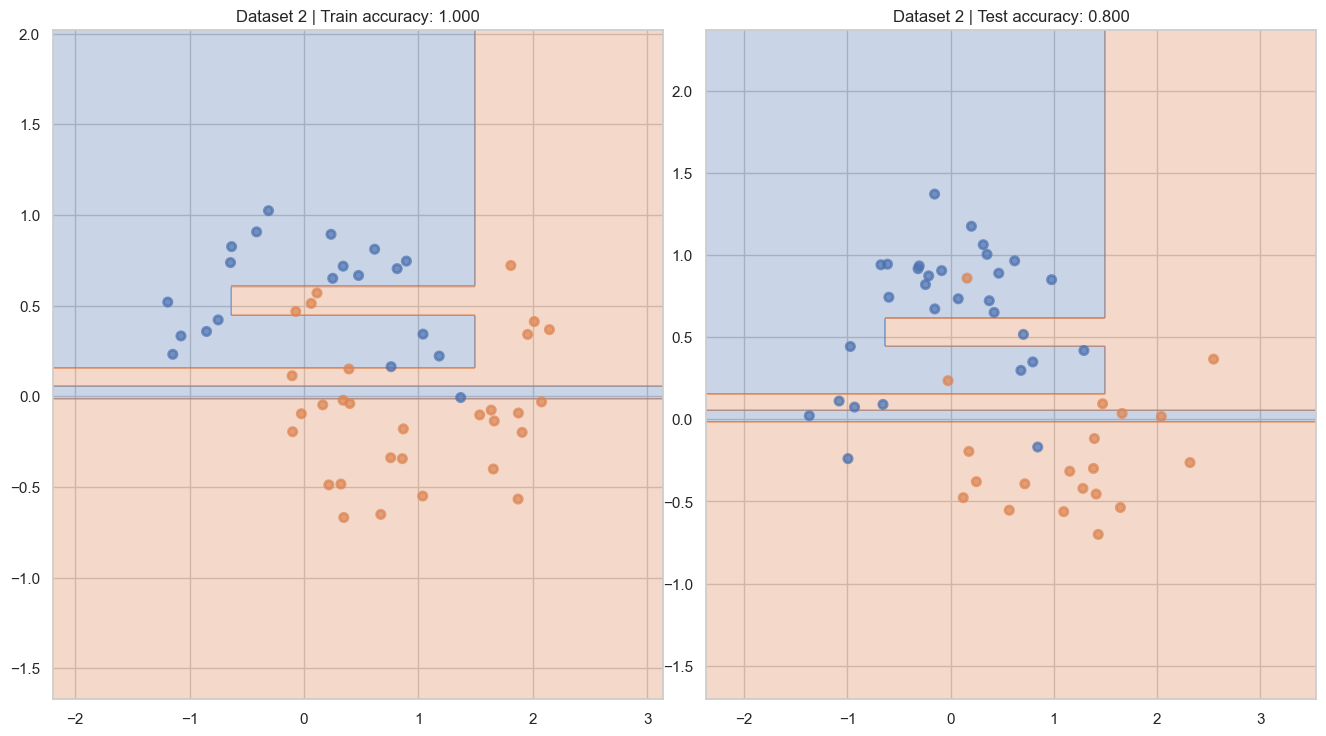

dataset №3
глубина дерева 6
обучающая Accuracy:1.000
тестовая Accuracy 0.740

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.75      0.53      0.62        17
           2       0.50      0.78      0.61         9

    accuracy                           0.74        50
   macro avg       0.71      0.73      0.70        50
weighted avg       0.77      0.74      0.74        50



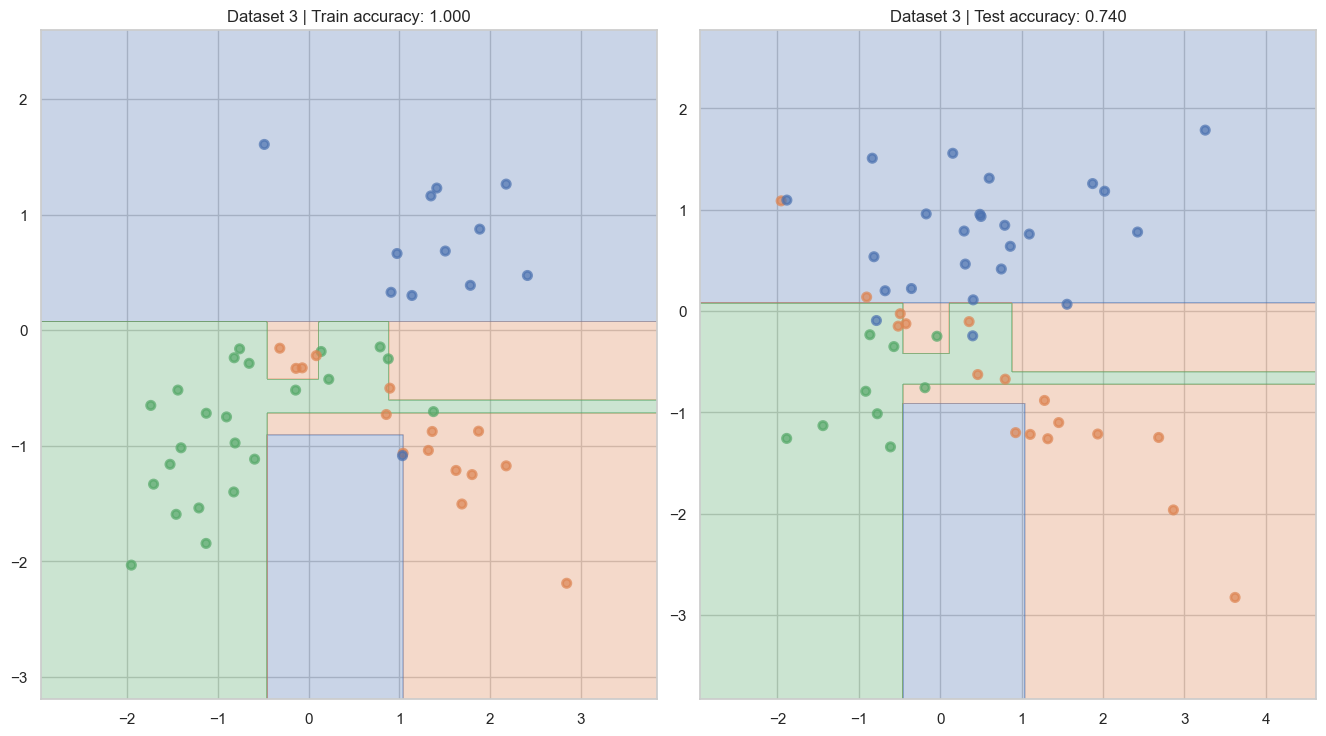

In [34]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score, classification_report

for i, (X, y) in enumerate(datasets):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    tree_depth = tree_clf.get_depth()
    train_preds = tree_clf.predict(X_train)
    test_preds = tree_clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_report = classification_report(y_test, test_preds, zero_division=0)

    print(f"dataset №{i+1}")
    print(f"глубина дерева {tree_depth}")
    print(f"обучающая Accuracy:{train_accuracy:.3f}")
    print(f"тестовая Accuracy {test_accuracy:.3f}\n")
    print(test_report)
    plt.figure(figsize=(14, 8))

    plt.subplot(1, 2, 1)
    plot_surface(tree_clf, X_train, y_train)
    plt.title(f'Dataset {i+1} | Train accuracy: {train_accuracy:.3f}')

    plt.subplot(1, 2, 2)
    plot_surface(tree_clf, X_test, y_test)
    plt.title(f'Dataset {i+1} | Test accuracy: {test_accuracy:.3f}')

    plt.show()

__Ответ:__

разделяющая поверхность для всех датасетов без регуляризации становится оч сложной и зубчатой — дерево пытается охватить каждый объект обучающей выборки, включая выбросы. Это приводит к почти идеальной точности на обучающей выборке, но ухудшается обобщающая способность, с добавлением ограничивающих параметров (max_depth=3-5, min_samples_leaf=5-10) разделяющая поверхность становится более гладкой и менее чувствительной к шуму, границы проще становятся, а дерево улавливает общие закономерности вместо запоминания конкретных объектов

обобщающая способность улучшилась для датасетов Circles и Moons, а для датасета Classification регуляризация иногда ухудшала качество, потому что этот датасет имеет более сложную структуру с тремя классами, и слишком грубые ограничения приводили к недообучению — дерево становилось слишком простым и не могло адекватно разделить классы.

в общем, для простых разделимых данных сильная регуляризация не очень, а для сложных нелинейных границ — полезна

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [35]:

import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    if len(np.unique(feature_vector)) == 1:
        return None, None, None, None
    sorted_indices = np.argsort(feature_vector)
    sorted_features = feature_vector[sorted_indices]
    sorted_targets = target_vector[sorted_indices]
    
    n = len(feature_vector)
    best_gini = -np.inf
    best_threshold = None
    thresholds = []
    ginis = []
    left_count0 = 0
    left_count1 = 0
    right_count0 = np.sum(sorted_targets == 0)
    right_count1 = np.sum(sorted_targets == 1)
    
    for i in range(1, n):
        if sorted_targets[i-1] == 0:
            left_count0 += 1
            right_count0 -= 1
        else:
            left_count1 += 1
            right_count1 -= 1
        
        if sorted_features[i] == sorted_features[i-1]:
            continue
            
        threshold = (sorted_features[i-1] + sorted_features[i]) / 2
        n_left = i
        n_right = n - i
        
        if n_left > 0:
            p_left0 = left_count0 / n_left
            p_left1 = left_count1 / n_left
            gini_left = 1 - p_left0**2 - p_left1**2
        else:
            gini_left = 0
            
        if n_right > 0:
            p_right0 = right_count0 / n_right
            p_right1 = right_count1 / n_right
            gini_right = 1 - p_right0**2 - p_right1**2
        else:
            gini_right = 0
        gini_gain = -(n_left/n) * gini_left - (n_right/n) * gini_right
        
        thresholds.append(threshold)
        ginis.append(gini_gain)
        
        if gini_gain > best_gini:
            best_gini = gini_gain
            best_threshold = threshold
    
    if best_threshold is None:
        return np.array([]), np.array([]), None, None
    
    return np.array(thresholds), np.array(ginis), best_threshold, best_gini


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")
        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self._depth = 0
    
    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if (self._max_depth is not None and depth >= self._max_depth) or \
           (self._min_samples_split is not None and len(sub_y) < self._min_samples_split) or \
           (np.all(sub_y == sub_y[0])):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        
        best_gini = -np.inf
        best_feature = None
        best_threshold = None
        best_split = None
        
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            feature_vector = sub_X[:, feature]
            
            if feature_type == "real":
                thresholds, ginis, threshold, gini = find_best_split(feature_vector, sub_y)
                
                if gini is not None and gini > best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
                    best_split = feature_vector < threshold
            
            elif feature_type == "categorical":
                unique_values = np.unique(feature_vector)
                value_to_mean = {}
                for value in unique_values:
                    mask = feature_vector == value
                    if np.sum(mask) > 0:
                        value_to_mean[value] = np.mean(sub_y[mask])
                
                sorted_categories = sorted(value_to_mean.items(), key=lambda x: x[1])
                sorted_values = [x[0] for x in sorted_categories]
                for i in range(1, len(sorted_values)):
                    threshold_values = set(sorted_values[:i])
                    split = np.array([x in threshold_values for x in feature_vector])
                    
                    n_left = np.sum(split)
                    n_right = len(split) - n_left
                    
                    if n_left == 0 or n_right == 0:
                        continue
                    
                    left_targets = sub_y[split]
                    right_targets = sub_y[~split]
                    
                    p_left1 = np.mean(left_targets)
                    p_left0 = 1 - p_left1
                    gini_left = 1 - p_left0**2 - p_left1**2
                    
                    p_right1 = np.mean(right_targets)
                    p_right0 = 1 - p_right1
                    gini_right = 1 - p_right0**2 - p_right1**2
                    
                    gini_gain = -(n_left/len(sub_y)) * gini_left - (n_right/len(sub_y)) * gini_right
                    
                    if gini_gain > best_gini:
                        best_gini = gini_gain
                        best_feature = feature
                        best_threshold = threshold_values
                        best_split = split
        
        if best_feature is None or (self._min_samples_leaf is not None and 
                                   (np.sum(best_split) < self._min_samples_leaf or 
                                    np.sum(~best_split) < self._min_samples_leaf)):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        
        node["type"] = "nonterminal"
        node["feature_split"] = best_feature
        node["threshold"] = best_threshold
        node["left_child"] = {}
        node["right_child"] = {}
        
        self._fit_node(sub_X[best_split], sub_y[best_split], 
                      node["left_child"], depth + 1)
        self._fit_node(sub_X[~best_split], sub_y[~best_split], 
                      node["right_child"], depth + 1)
    
    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        
        feature_idx = node["feature_split"]
        feature_value = x[feature_idx]
        
        if self._feature_types[feature_idx] == "real":
            if feature_value < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if feature_value in node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
    
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)
    
    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

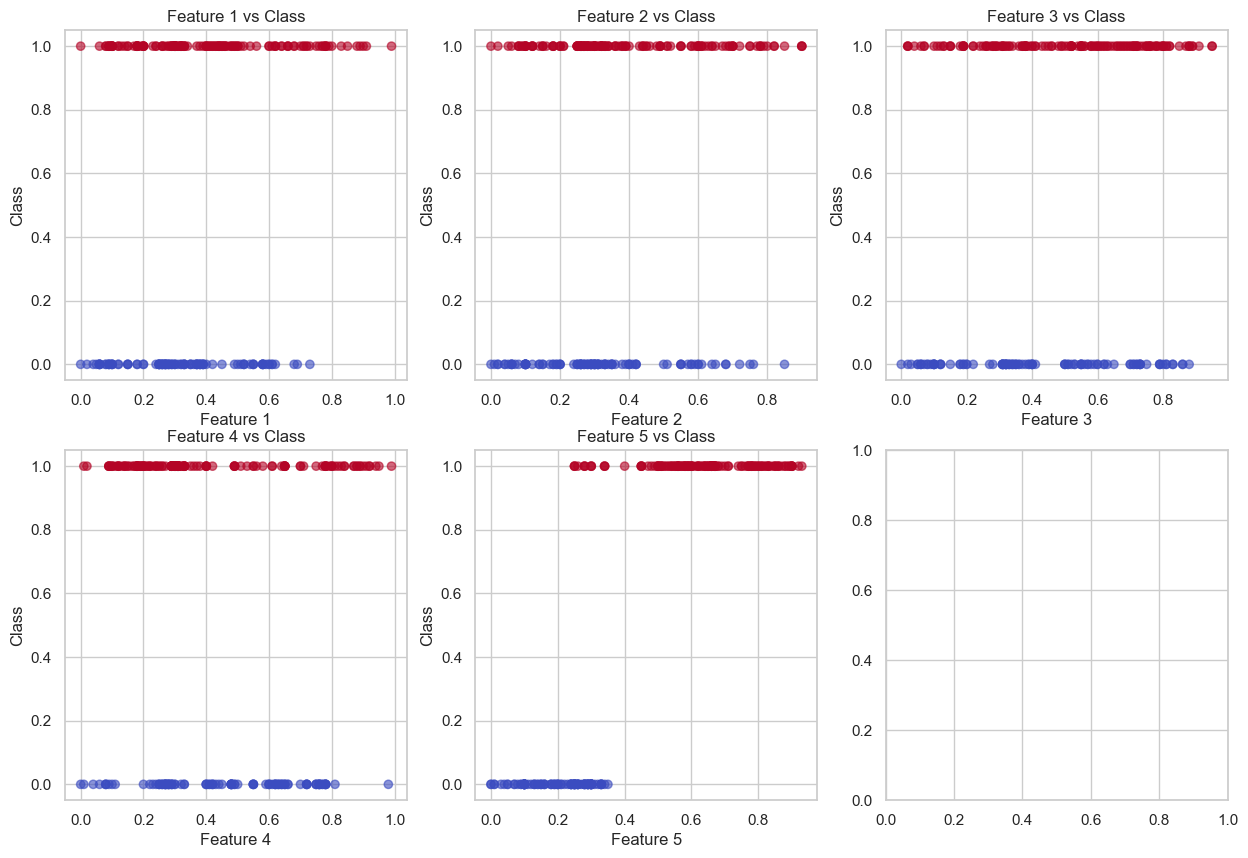

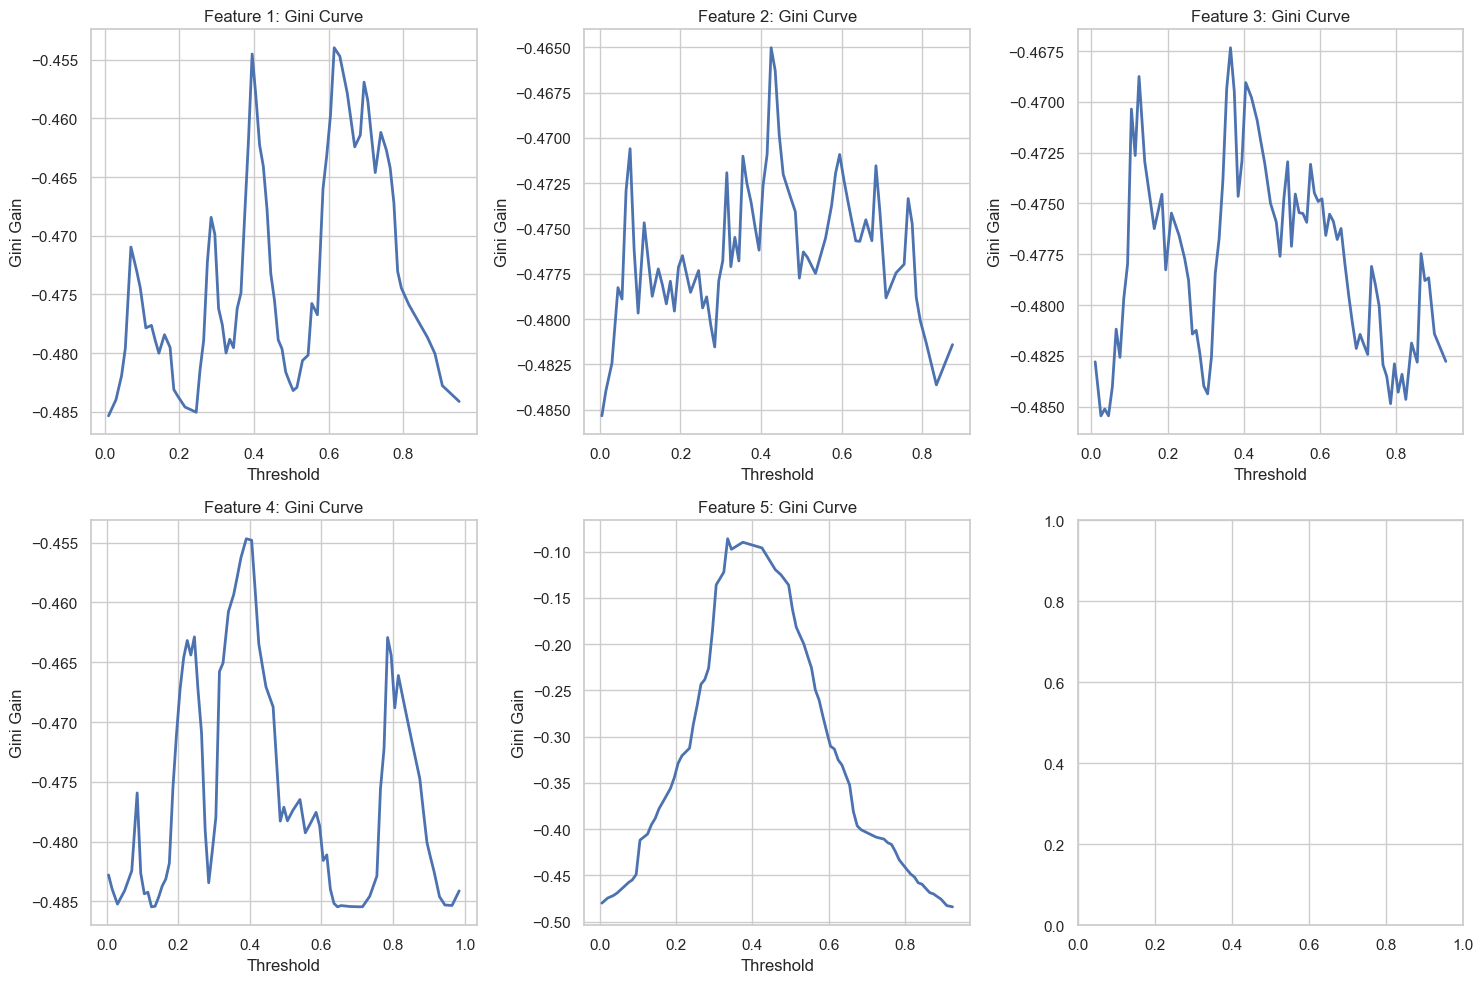


Анализ кривых Джини:
Признак 1:
  Лучший порог: 0.615
  Максимальный прирост Джини: -0.454
  Число порогов: 74

Признак 2:
  Лучший порог: 0.425
  Максимальный прирост Джини: -0.465
  Число порогов: 70

Признак 3:
  Лучший порог: 0.365
  Максимальный прирост Джини: -0.467
  Число порогов: 82

Признак 4:
  Лучший порог: 0.390
  Максимальный прирост Джини: -0.455
  Число порогов: 79

Признак 5:
  Лучший порог: 0.335
  Максимальный прирост Джини: -0.086
  Число порогов: 78



In [41]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score

students_df = pd.read_csv('students.csv')

X = students_df.iloc[:, :-1].values
y = students_df.iloc[:, -1].values

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(5):
    ax = axes[i]
    scatter = ax.scatter(X[:, i], y, alpha=0.6, c=y, cmap='coolwarm')
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('Class')
    ax.set_title(f'Feature {i+1} vs Class')
    ax.grid(True)

fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))
axes2 = axes2.flatten()

for i in range(5):
    ax = axes2[i]
    feature_vector = X[:, i]
    
    thresholds, ginis, _, _ = find_best_split(feature_vector, y)
    
    if len(thresholds) > 0:
        ax.plot(thresholds, ginis, 'b-', linewidth=2)
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Gini Gain')
        ax.set_title(f'Feature {i+1}: Gini Curve')
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Constant feature', 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.set_title(f'Feature {i+1}: Constant')

plt.tight_layout()
plt.show()

print("\nАнализ кривых Джини:")
print("=" * 50)
for i in range(5):
    feature_vector = X[:, i]
    thresholds, ginis, best_threshold, best_gini = find_best_split(feature_vector, y)
    
    if best_gini is not None:
        print(f"Признак {i+1}:")
        print(f"  Лучший порог: {best_threshold:.3f}")
        print(f"  Максимальный прирост Джини: {best_gini:.3f}")
        print(f"  Число порогов: {len(thresholds)}")
        print()
    else:
        print(f"Признак {i+1}: константный или неразделяемый")
        print()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** деление выборки следует производить по признаку с наибольшим максимальным значением критерия Джини;
да, согласуется;
есть несколько локальных максимумов, видно хорошо пики кривой, максимум близок к теоретическому максимуму,быстрое изменение Gain около оптимального порога;
низкие значения Gain на всех порогах, малые колебания, нет четкого оптимального порога, максимум очень мал(меньше 0.1);

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    """
    Находит лучший порог для разделения выборки по критерию Джини.
    """
    # Проверка на константный признак
    if len(np.unique(feature_vector)) == 1:
        return np.array([]), np.array([]), None, None
    
    # Сортируем значения признака и соответствующие метки
    sorted_indices = np.argsort(feature_vector)
    sorted_features = feature_vector[sorted_indices]
    sorted_targets = target_vector[sorted_indices]
    
    # Инициализация
    n = len(feature_vector)
    best_gini = -np.inf
    best_threshold = None
    thresholds = []
    ginis = []
    
    # Предварительные вычисления
    left_count0 = 0
    left_count1 = 0
    right_count0 = np.sum(sorted_targets == 0)
    right_count1 = np.sum(sorted_targets == 1)
    
    # Перебираем все возможные пороги
    for i in range(1, n):
        # Обновляем счетчики
        if sorted_targets[i-1] == 0:
            left_count0 += 1
            right_count0 -= 1
        else:
            left_count1 += 1
            right_count1 -= 1
        
        # Пропускаем одинаковые значения признака
        if sorted_features[i] == sorted_features[i-1]:
            continue
            
        # Вычисляем порог как среднее соседних значений
        threshold = (sorted_features[i-1] + sorted_features[i]) / 2
        
        # Вычисляем критерий Джини
        n_left = i
        n_right = n - i
        
        if n_left > 0:
            p_left0 = left_count0 / n_left
            p_left1 = left_count1 / n_left
            gini_left = 1 - p_left0**2 - p_left1**2
        else:
            gini_left = 0
            
        if n_right > 0:
            p_right0 = right_count0 / n_right
            p_right1 = right_count1 / n_right
            gini_right = 1 - p_right0**2 - p_right1**2
        else:
            gini_right = 0
            
        # Взвешенный критерий Джини
        gini_gain = -(n_left/n) * gini_left - (n_right/n) * gini_right
        
        # Сохраняем порог и значение критерия
        thresholds.append(threshold)
        ginis.append(gini_gain)
        
        # Обновляем лучший порог
        if gini_gain > best_gini:
            best_gini = gini_gain
            best_threshold = threshold
    
    # Если не нашли подходящий порог
    if best_threshold is None:
        return np.array([]), np.array([]), None, None
    
    return np.array(thresholds), np.array(ginis), best_threshold, best_gini


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")
        
        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
    
    def _fit_node(self, sub_X, sub_y, node, depth=0):
        # Критерии остановки
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            node["depth"] = depth
            return
        
        if self._max_depth is not None and depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            node["depth"] = depth
            return
        
        if self._min_samples_split is not None and len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            node["depth"] = depth
            return
        
        # Поиск лучшего разделения
        best_gini = -np.inf
        best_feature = None
        best_threshold = None
        best_split = None
        
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            feature_vector = sub_X[:, feature]
            
            if feature_type == "real":
                thresholds, ginis, threshold, gini = find_best_split(feature_vector, sub_y)
                
                if gini is not None and gini > best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
                    best_split = feature_vector < threshold
            
            elif feature_type == "categorical":
                unique_values = np.unique(feature_vector)
                
                value_to_mean = {}
                for value in unique_values:
                    mask = feature_vector == value
                    if np.sum(mask) > 0:
                        value_to_mean[value] = np.mean(sub_y[mask])
                
                sorted_categories = sorted(value_to_mean.items(), key=lambda x: x[1])
                sorted_values = [x[0] for x in sorted_categories]
                
                for i in range(1, len(sorted_values)):
                    threshold_values = set(sorted_values[:i])
                    split = np.array([x in threshold_values for x in feature_vector])
                    
                    n_left = np.sum(split)
                    n_right = len(split) - n_left
                    
                    if n_left == 0 or n_right == 0:
                        continue
                    
                    left_targets = sub_y[split]
                    right_targets = sub_y[~split]
                    
                    p_left1 = np.mean(left_targets)
                    p_left0 = 1 - p_left1
                    gini_left = 1 - p_left0**2 - p_left1**2
                    
                    p_right1 = np.mean(right_targets)
                    p_right0 = 1 - p_right1
                    gini_right = 1 - p_right0**2 - p_right1**2
                    
                    gini_gain = -(n_left/len(sub_y)) * gini_left - (n_right/len(sub_y)) * gini_right
                    
                    if gini_gain > best_gini:
                        best_gini = gini_gain
                        best_feature = feature
                        best_threshold = threshold_values
                        best_split = split
        
        # Если не нашли разделение
        if best_feature is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            node["depth"] = depth
            return
        
        # Проверка минимального количества объектов в листе
        if self._min_samples_leaf is not None:
            n_left = np.sum(best_split)
            n_right = len(best_split) - n_left
            if n_left < self._min_samples_leaf or n_right < self._min_samples_leaf:
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                node["depth"] = depth
                return
        
        # Создаем ненулевую ноду
        node["type"] = "nonterminal"
        node["feature_split"] = best_feature
        node["threshold"] = best_threshold
        node["feature_type"] = self._feature_types[best_feature]
        node["depth"] = depth
        
        # Рекурсивно строим поддеревья
        node["left_child"] = {}
        node["right_child"] = {}
        
        self._fit_node(sub_X[best_split], sub_y[best_split], 
                      node["left_child"], depth + 1)
        self._fit_node(sub_X[~best_split], sub_y[~best_split], 
                      node["right_child"], depth + 1)
    
    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        
        feature_idx = node["feature_split"]
        feature_value = x[feature_idx]
        
        if node["feature_type"] == "real":
            if feature_value < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if feature_value in node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
    
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)
    
    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
    
    def get_depth(self):
        """Возвращает глубину дерева"""
        def _get_max_depth(node):
            if node["type"] == "terminal":
                return node.get("depth", 0)
            else:
                left_depth = _get_max_depth(node["left_child"])
                right_depth = _get_max_depth(node["right_child"])
                return max(left_depth, right_depth)
        
        return _get_max_depth(self._tree)

Размерность признаков: (8124, 22)
Размерность целевой переменной: (8124,)
Распределение классов: [4208 3916]
Класс 0: e
Класс 1: p

Разделение данных:
Обучающая выборка: 4062 объектов
Тестовая выборка: 4062 объектов
Распределение классов в обучающей выборке: [2104 1958]
Распределение классов в тестовой выборке: [2104 1958]


AttributeError: 'DecisionTree' object has no attribute 'get_depth'

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).


Первые 5 строк датасета tic-tac-toe:
  V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive

Распределение классов (последний столбец):
V10
positive    626
negative    332
Name: count, dtype: int64

Кодирование классов: ['negative' 'positive'] -> [0 1]

Размерность данных после кодирования: X=(958, 9), y=(958,)
Распределение классов: [332 626]


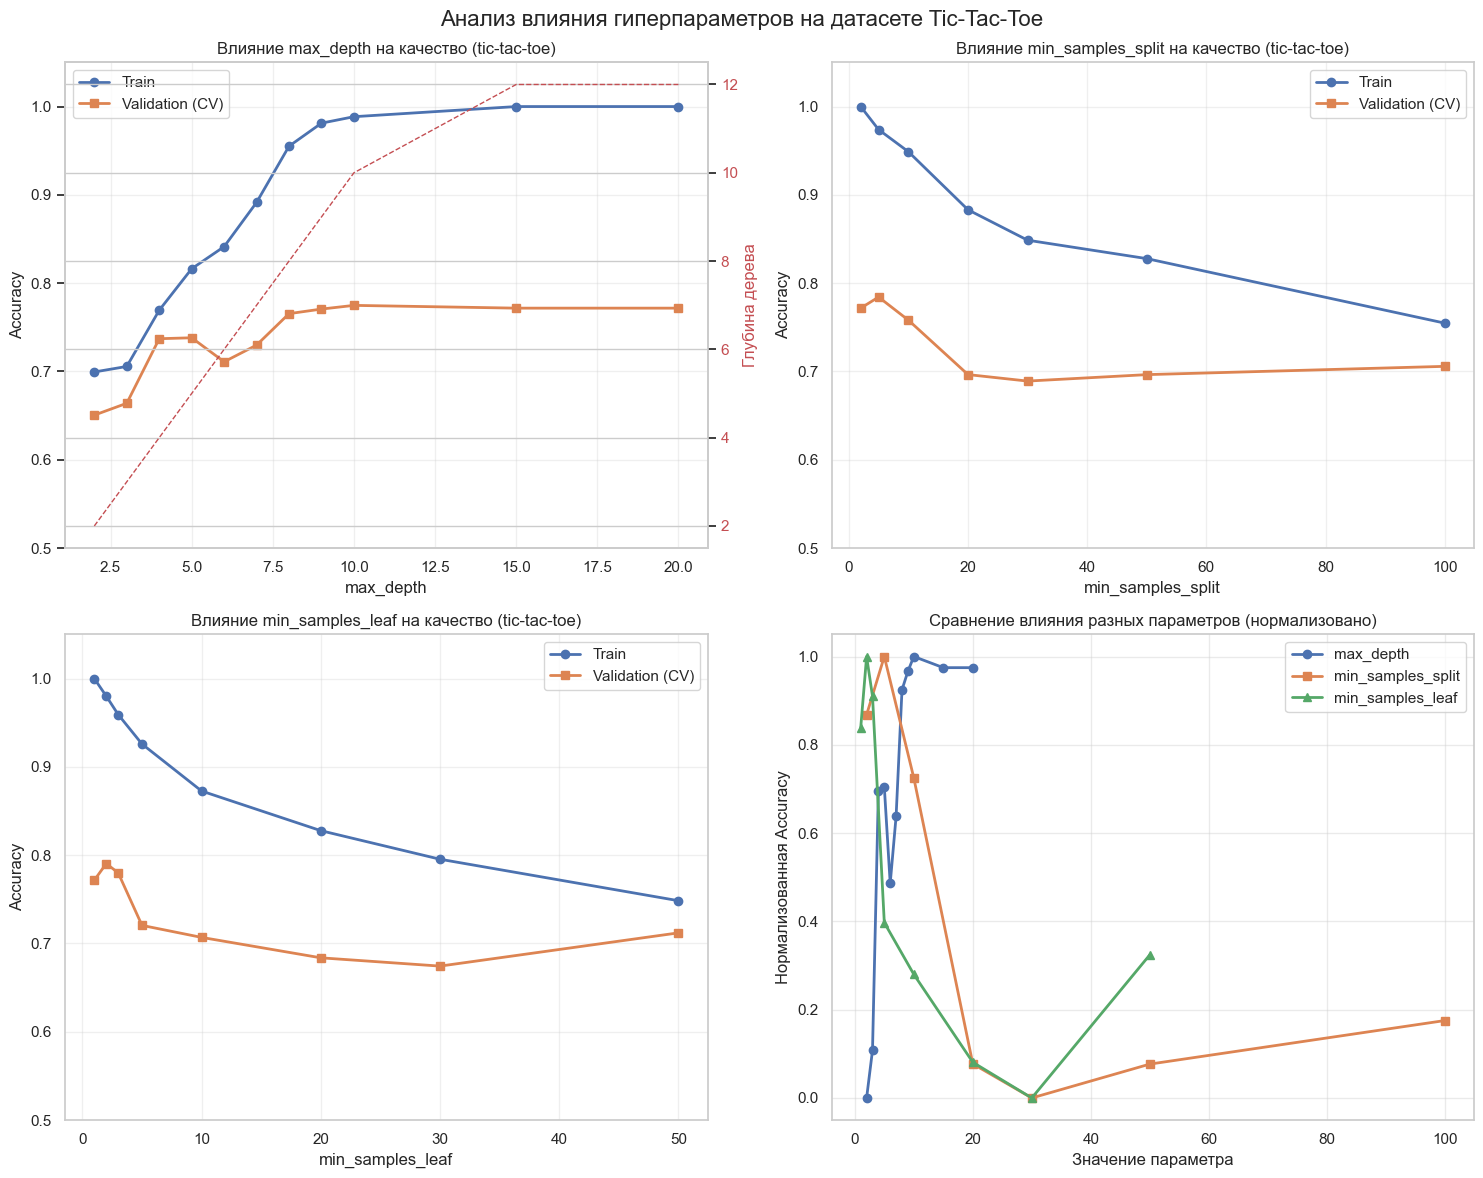


max_depth:
  Лучшее значение: 10 (accuracy = 0.7748)
  Глубина дерева: 10

min_samples_split:
  Лучшее значение: 5 (accuracy = 0.7842)

min_samples_leaf:
  Лучшее значение: 2 (accuracy = 0.7904)


In [47]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
import seaborn as sns

try:
    tic_tac_toe_data = pd.read_csv('tic-tac-toe-endgame.csv')
except FileNotFoundError:
    print("'tic-tac-toe-endgame.csv' не найден.")
    raise

print("\nПервые 5 строк датасета tic-tac-toe:")
print(tic_tac_toe_data.head())

print("\nРаспределение классов (последний столбец):")
print(tic_tac_toe_data.iloc[:, -1].value_counts())

label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(tic_tac_toe_data.iloc[:, -1])

print(f"\nКодирование классов: {label_encoder.classes_} -> {np.arange(len(label_encoder.classes_))}")

X_encoded = tic_tac_toe_data.iloc[:, :-1].copy()
for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

X = X_encoded.values
y = target_encoded

print(f"\nРазмерность данных после кодирования: X={X.shape}, y={y.shape}")
print(f"Распределение классов: {np.bincount(y)}")


def analyze_parameter_impact(X, y, param_name, param_values, cv=5):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import cross_val_score
    
    train_scores = []
    val_scores = []
    depths = []
    
    for param_value in param_values:
        if param_name == 'max_depth':
            tree = DecisionTreeClassifier(
                max_depth=param_value,
                random_state=42
            )
        elif param_name == 'min_samples_split':
            tree = DecisionTreeClassifier(
                min_samples_split=param_value,
                random_state=42
            )
        elif param_name == 'min_samples_leaf':
            tree = DecisionTreeClassifier(
                min_samples_leaf=param_value,
                random_state=42
            )
        else:
            raise ValueError(f"Неизвестный параметр: {param_name}")
        
        cv_scores = cross_val_score(tree, X, y, cv=cv, scoring='accuracy')
        val_scores.append(cv_scores.mean())
        tree.fit(X, y)
        depths.append(tree.get_depth())
        
        train_score = accuracy_score(y, tree.predict(X))
        train_scores.append(train_score)
    
    return train_scores, val_scores, depths

max_depth_values = [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
train_scores_depth, val_scores_depth, depths = analyze_parameter_impact(
    X, y, 'max_depth', max_depth_values, cv=10
)

min_samples_split_values = [2, 5, 10, 20, 30, 50, 100]
train_scores_split, val_scores_split, _ = analyze_parameter_impact(
    X, y, 'min_samples_split', min_samples_split_values, cv=10
)

min_samples_leaf_values = [1, 2, 3, 5, 10, 20, 30, 50]
train_scores_leaf, val_scores_leaf, _ = analyze_parameter_impact(
    X, y, 'min_samples_leaf', min_samples_leaf_values, cv=10
)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

ax1 = axes[0, 0]
ax1.plot(max_depth_values, train_scores_depth, 'o-', label='Train', linewidth=2)
ax1.plot(max_depth_values, val_scores_depth, 's-', label='Validation (CV)', linewidth=2)
ax1.set_xlabel('max_depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Влияние max_depth на качество (tic-tac-toe)')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_ylim([0.5, 1.05])

ax1_twin = ax1.twinx()
ax1_twin.plot(max_depth_values, depths, 'r--', label='Depth', linewidth=1)
ax1_twin.set_ylabel('Глубина дерева', color='r')
ax1_twin.tick_params(axis='y', labelcolor='r')

ax2 = axes[0, 1]
ax2.plot(min_samples_split_values, train_scores_split, 'o-', label='Train', linewidth=2)
ax2.plot(min_samples_split_values, val_scores_split, 's-', label='Validation (CV)', linewidth=2)
ax2.set_xlabel('min_samples_split')
ax2.set_ylabel('Accuracy')
ax2.set_title('Влияние min_samples_split на качество (tic-tac-toe)')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim([0.5, 1.05])

ax3 = axes[1, 0]
ax3.plot(min_samples_leaf_values, train_scores_leaf, 'o-', label='Train', linewidth=2)
ax3.plot(min_samples_leaf_values, val_scores_leaf, 's-', label='Validation (CV)', linewidth=2)
ax3.set_xlabel('min_samples_leaf')
ax3.set_ylabel('Accuracy')
ax3.set_title('Влияние min_samples_leaf на качество (tic-tac-toe)')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_ylim([0.5, 1.05])
ax4 = axes[1, 1]

def normalize(values):
    return (np.array(values) - np.min(values)) / (np.max(values) - np.min(values))

mask = [v is not None for v in max_depth_values]
valid_max_depth = [v for v in max_depth_values if v is not None]
valid_val_depth = [val_scores_depth[i] for i, v in enumerate(max_depth_values) if v is not None]

ax4.plot(valid_max_depth, normalize(valid_val_depth), 'o-', label='max_depth', linewidth=2)
ax4.plot(min_samples_split_values, normalize(val_scores_split), 's-', label='min_samples_split', linewidth=2)
ax4.plot(min_samples_leaf_values, normalize(val_scores_leaf), '^-', label='min_samples_leaf', linewidth=2)
ax4.set_xlabel('Значение параметра')
ax4.set_ylabel('Нормализованная Accuracy')
ax4.set_title('Сравнение влияния разных параметров (нормализовано)')
ax4.grid(True, alpha=0.4)
ax4.legend()

plt.suptitle('Анализ влияния гиперпараметров на датасете Tic-Tac-Toe', fontsize=16)
plt.tight_layout()
plt.show()

best_depth_idx = np.argmax(val_scores_depth)
print(f"\nmax_depth:")
print(f"  Лучшее значение: {max_depth_values[best_depth_idx]} (accuracy = {val_scores_depth[best_depth_idx]:.4f})")
print(f"  Глубина дерева: {depths[best_depth_idx]}")

best_split_idx = np.argmax(val_scores_split)
print(f"\nmin_samples_split:")
print(f"  Лучшее значение: {min_samples_split_values[best_split_idx]} (accuracy = {val_scores_split[best_split_idx]:.4f})")

best_leaf_idx = np.argmax(val_scores_leaf)
print(f"\nmin_samples_leaf:")
print(f"  Лучшее значение: {min_samples_leaf_values[best_leaf_idx]} (accuracy = {val_scores_leaf[best_leaf_idx]:.4f})")
 

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** 
ранжирование алгоритмов не является одинаковым для разных наборов данных
признаки это позиции на игровом поле, между ними сложные комбинаторные зависимости. One-hot кодирование, когда разбивает каждый признак на несколько бинарных, разрушает эти зависимости, поэтому относительно эффективность низкая. представление по категориям, которое сохраняет исходную структуру признаков, работает лучше

для датасетов cars и nursery, где у признаков часто есть естественный порядок, категориальное представление также демонстрирует преимущество. но разница между подходами здесь менее выражена, это может указывать на сложную и нелинейную природу зависимостей

категориальные признаки можно разделить на номинальные (без естественного порядка, допустим виды запахов в mushrooms), порядковые (с естественным ранжированием, как уровни безопасности в cars) и комбинаторные (где важны взаимосвязи между признаками, как позиции в tic-tac-toe). каждый тип требует своего подхода при обработке. one-hot кодирование хорошо работает для номинальных признаков с небольшим количеством категорий, но становится проблемным при их большом количестве. перевод в вещественные числа через LabelEncoder часто наихудший выбор, так как создаёт искусственные и потенциально вводящие в заблуждение порядковые отношения??

компонента случайности присутствует, так как само разбиение данных на обучающую и тестовую выборки вносит случайность, заметную на небольших датасетах, LabelEncoder назначает числовые значения категориям в алфавитном порядке или порядке их появления в данных, что создаёт произвольные порядковые отношения. при равенстве значений критерия Джини для разных признаков или порогов выбор разбиения может быть недетерминированным

можно уменьшить влияние случайности и улучшить работу алгоритмов
надо фиксировать random_state для воспроизводимости результатов, для обработки категориальных признаков стоит поискать методы получше, чем простое присвоение среднего значения таргета. Target encoding с регуляризацией или leave-one-out encoding могут дать лучшие результаты. для one-hot кодирования эффективным мб предварительное уменьшение количества категорий с помощью объединения редких значений. еще нужно оптимизировать гиперпараметры для каждого датасета отдельно - как показал анализ для tic-tac-toe, оптимальная глубина дерева, минимальное количество объектов для разделения и минимальный размер листа и тд существенно влияют на качество

в общем и целом, нет универсального лучшего подхода к обработке категориальных признаков в решающих деревьях. выбор метода должен отталкиваться от природы данных, количества категорий, наличия порядковых отношений и взаимосвязи между признаками

Вставьте что угодно, описывающее ваши впечатления от этого задания: